In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline

## Fields

In [2]:
header = ['WBANNO','UTC_DATE','UTC_TIME','LST_DATE','LST_TIME','CRX_VN','LONGITUDE','LATITUDE',
          'T_CALC','T_HR_AVG','T_MAX','T_MIN','P_CALC','SOLARAD','SOLARAD_FLAG','SOLARAD_MAX',
          'SOLARAD_MAX_FLAG','SOLARAD_MIN','SOLARAD_MIN_FLAG','SUR_TEMP_TYPE','SUR_TEMP','SUR_TEMP_FLAG',
          'SUR_TEMP_MAX','SUR_TEMP_MAX_FLAG','SUR_TEMP_MIN','SUR_TEMP_MIN_FLAG','RH_HR_AVG','RH_HR_AVG_FLAG',
          'SOIL_MOISTURE_5','SOIL_MOISTURE_10','SOIL_MOISTURE_20','SOIL_MOISTURE_50','SOIL_MOISTURE_100',
          'SOIL_TEMP_5','SOIL_TEMP_10','SOIL_TEMP_20','SOIL_TEMP_50','SOIL_TEMP_100']

## Read in each file

In [3]:
files = glob.glob('./data/CRN/hourly/boulder/*.txt')

In [4]:
len(files)

12

In [5]:
crn = pd.DataFrame(columns=header)
for fl in files:
    tmp = pd.read_table(fl,delim_whitespace=True,names=header)
    crn = crn.append(tmp)

In [6]:
# build a date parsing function to be applied to the whole dataframe
def parsedate(x):
    ymd = x.LST_DATE
    hm = x.LST_TIME
    
    y = int(str(int(ymd))[0:4])
    m = int(str(int(ymd))[4:6])
    d = int(str(int(ymd))[6:])
    
    hm = int(hm)
    if len(str(hm))==1:
        h = 0
    elif len(str(hm))==3:
        h = int(str(hm)[0])
    else:
        h = int(str(hm)[0:2])
    
    return pd.datetools.datetime(y,m,d,h)

In [7]:
crn.reset_index(inplace=True)

In [8]:
dates = crn.apply(parsedate,axis=1)

In [9]:
crn.index = pd.DatetimeIndex(dates)

In [10]:
crn = crn['2003-09-28 00:00:00':] # crop to only contain full days

In [11]:
crn.loc[crn.P_CALC==-9999] = np.NaN

In [12]:
crn['ptime'] = 0. # make a column for the hours it rained

In [13]:
crn.loc[crn.P_CALC>0.,'ptime']=1. # make the ptime column 1 if there is precip

In [14]:
crn2 = crn.resample('D',how=np.nansum) # resample to daily data

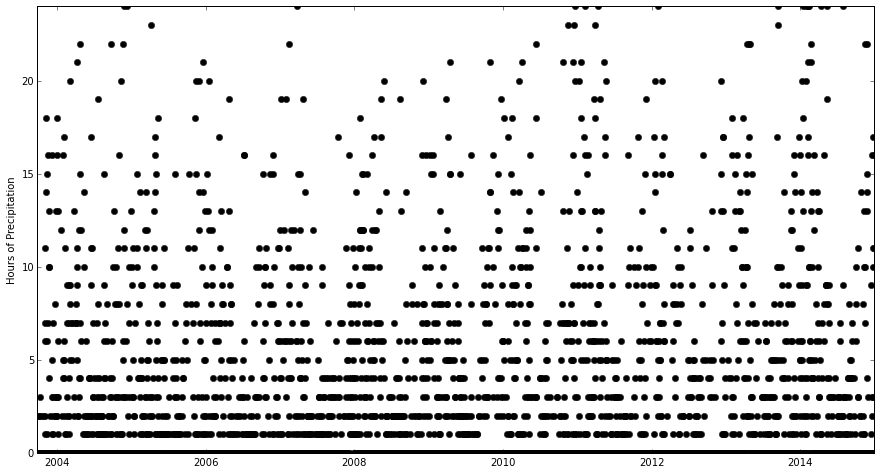

In [15]:
plt.figure(figsize=(15,8))
plt.plot(crn2.index,crn2.ptime,'ok')
plt.ylim(0,24)
plt.ylabel('Hours of Precipitation')

In [15]:
crn3 = crn.resample('W',how='sum')

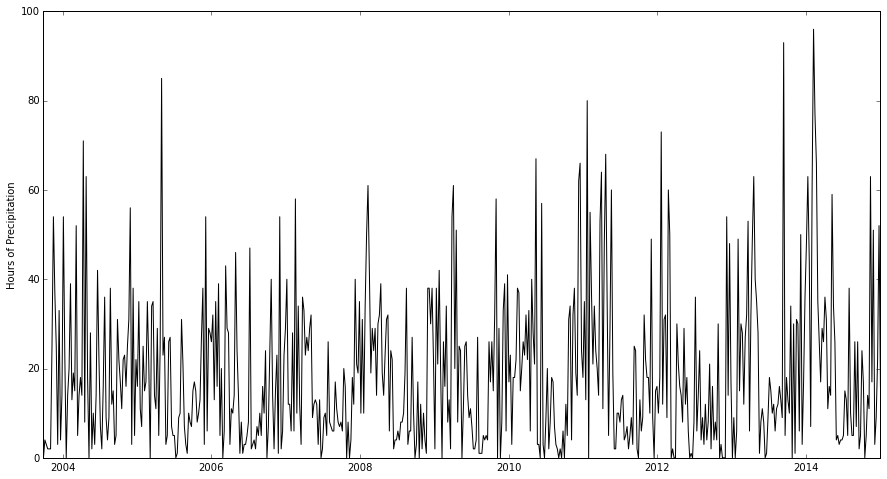

In [16]:
plt.figure(figsize=(15,8))
plt.plot(crn3.index,crn3.ptime,'-k')
#plt.ylim(0,48)
plt.ylabel('Hours of Precipitation')

In [17]:
len(crn2.loc[crn2.ptime>24])

0

In [18]:
crn2.head()

,index,WBANNO,UTC_DATE,UTC_TIME,LST_DATE,LST_TIME,CRX_VN,LONGITUDE,LATITUDE,T_CALC,...,SOIL_MOISTURE_10,SOIL_MOISTURE_20,SOIL_MOISTURE_50,SOIL_MOISTURE_100,SOIL_TEMP_5,SOIL_TEMP_10,SOIL_TEMP_20,SOIL_TEMP_50,SOIL_TEMP_100,ptime
2003-09-28,540,2257800,480742279,27600,480742272,27600,28.824,-2532.96,960.96,53.2,...,-2376,-2376,-2376,-2376,-239976,-239976,-239976,-239976,-239976,0
2003-09-29,1116,2257800,480742303,27600,480742296,27600,28.824,-2532.96,960.96,106.9,...,-2376,-2376,-2376,-2376,-239976,-239976,-239976,-239976,-239976,0
2003-09-30,1692,2257800,480742817,27600,480742320,27600,28.824,-2532.96,960.96,106.7,...,-2376,-2376,-2376,-2376,-239976,-239976,-239976,-239976,-239976,0
2003-10-01,2268,2257800,480744031,27600,480744024,27600,28.824,-2532.96,960.96,153.2,...,-2376,-2376,-2376,-2376,-239976,-239976,-239976,-239976,-239976,0
2003-10-02,2844,2257800,480744055,27600,480744048,27600,28.824,-2532.96,960.96,156.9,...,-2376,-2376,-2376,-2376,-239976,-239976,-239976,-239976,-239976,2


In [19]:
strt = '2007-10-1'
nd = '2008-10-15'
head = '2007 10 1'
np.savetxt('/RHESSys/ComoCreek_new/clim/smexperiment/daily/boulder_crn.daytime_rain_duration',crn2[strt:nd].ptime.as_matrix(),comments='',
           header=head,fmt='%i')

In [25]:
import seaborn as sns
import statsmodels.formula.api as sm

                            OLS Regression Results                            
Dep. Variable:                  ptime   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     6528.
Date:                Mon, 06 Jul 2015   Prob (F-statistic):               0.00
Time:                        12:10:48   Log-Likelihood:                -10193.
No. Observations:                4113   AIC:                         2.039e+04
Df Residuals:                    4111   BIC:                         2.040e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0826      0.049     22.021      0.0

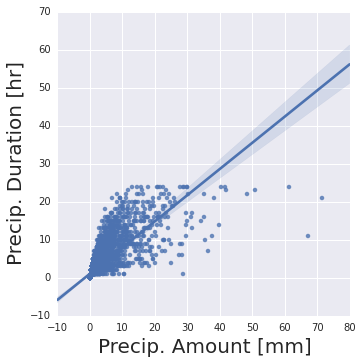

In [27]:
plt.figure(figsize=(10,10))
#plt.plot(crn2.ptime,crn2.P_CALC,'ok')
sns.lmplot('P_CALC','ptime',crn2)
plt.ylabel('Precip. Duration [hr]',fontsize=20)
plt.xlabel('Precip. Amount [mm]', fontsize=20)

mod = sm.OLS.from_formula('ptime ~ P_CALC + 1', crn2).fit()
print mod.summary()